In [67]:
!pip install notebook wordcloud pillow pandas bs4
!pip install notebook wordcloud pillow numpy bs4

In [68]:
!pip install wordcloud


In [69]:
!pip install tqdm

In [53]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import requests

In [4]:
url_base = 'http://www.mldb.org'

In [5]:
artista = 'artist-5927-loshermanos.html'
req = requests.get(f'{url_base}/{artista}', headers={'User-Agent': 'Mozilla/5.0'})

In [6]:
pagina = req.text

pagina

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n<head>\n<title>MLDb, The Music Lyrics Database - List of songs of Los Hermanos by albums</title>\n<meta name="Author" content="Nikolay Pelov, NickSoft" />\n<meta name="Description" content="List of songs of Los Hermanos by albums" />\n<meta name="Keywords" content="music,song,lyrics,mldb,artist,group,performer,Los Hermanos,A Taça Do Mundo É Nossa ( trilha sonora ),Bloco do Eu Sozinho,Lisbela E O Prisioneiro ( trilha sonora ),Los Hermanos,Luau MTV,Superfantástico,Ventura," />\n<meta name="robots" content="index,follow" />\n<meta name="revisit-after" content="7 days" />\n<meta name="title" content="MLDb, The Music Lyrics Database - List of songs of Los Hermanos by albums" />\n<meta name="distribution" content="Global" />\n<meta name="rating" content="general" />\n<link href="style.css" media="all" 

In [7]:
# Organizando a nossa 'sopa' de musicas
sopao = BeautifulSoup(pagina, 'html.parser')

sopao

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>MLDb, The Music Lyrics Database - List of songs of Los Hermanos by albums</title>
<meta content="Nikolay Pelov, NickSoft" name="Author"/>
<meta content="List of songs of Los Hermanos by albums" name="Description"/>
<meta content="music,song,lyrics,mldb,artist,group,performer,Los Hermanos,A Taça Do Mundo É Nossa ( trilha sonora ),Bloco do Eu Sozinho,Lisbela E O Prisioneiro ( trilha sonora ),Los Hermanos,Luau MTV,Superfantástico,Ventura," name="Keywords"/>
<meta content="index,follow" name="robots"/>
<meta content="7 days" name="revisit-after"/>
<meta content="MLDb, The Music Lyrics Database - List of songs of Los Hermanos by albums" name="title"/>
<meta content="Global" name="distribution"/>
<meta content="general" name="rating"/>
<link href="style.css" media="all" rel="stylesheet" typ

In [8]:
# Agora, extraindo links das músicas

links_musicas = sopao.find_all('a', {'href': re.compile(r'song-*')} )

len(links_musicas)

49

In [9]:
links_musicas[1]

<a href="song-165101-a-flor.html">A Flor</a>

In [29]:
# Tive um problema no encoding, então, fiz diferente do video do Leon, colocando o encoding = 'UTF-8'

from tqdm import tqdm

letras_losHermanos = ''

with open('./data/lyrics_loshermanos.txt', 'w', encoding = 'UTF-8') as arquivo_letras:
    for link_musica in tqdm(links_musicas):
          url_musica = link_musica['href']
          url_completa = f'{url_base}/{url_musica}'

          req = requests.get(url_completa, headers={'User-Agent': 'Mozilla/5.0'})

          sopao_musica = BeautifulSoup(req.text, 'html.parser')

          letra = sopao_musica.find('p', {'class': 'songtext'})

          arquivo_letras.write(f'{letra.text}\n')

          letras_losHermanos += f'{letra.text}\n'

100%|██████████| 49/49 [00:24<00:00,  2.01it/s]


In [38]:
tokens = letras_losHermanos.split()

In [39]:
len(tokens)

6663

In [49]:
# Conversão em minúsculo

for i in range(len(tokens)):
    tokens [i] = tokens[i].lower().strip()

tokens[1]

'a'

In [70]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [76]:
palavras_losHermanos = " ".join(tokens)

palavras_losHermanos[0:200]

'olha, a primeira vez que eu estive aqui foi só pra me distrair eu vim em busca do amor olha, foi então que eu te conheci naquela noite fria em seus braços meus problemas esqueci olha, a segunda vez qu'

In [80]:
# Sem máscara

wordcloud = WordCloud(background_color = 'black',
                #stopwords = stopwords_customizada,
                #contour_width = 1,
                #contour_color  = 'white',
                colormap='Purples',
                random_state=42).generate(palavras_losHermanos)



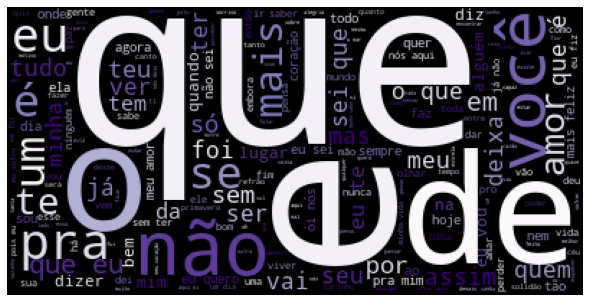

In [81]:
# Mostrando a imagem
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [146]:
# Buscar a mascara da imagem

imagem_mascara = np.array(Image.open("./img/los_hermanos.jpg"))

imagem_mascara

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [147]:
wordcloud = WordCloud(background_color ='black',
                     max_words = 1000,
                     mask=imagem_mascara,
                     #colormap='Purples',
                     random_state=42).generate(palavras_losHermanos)

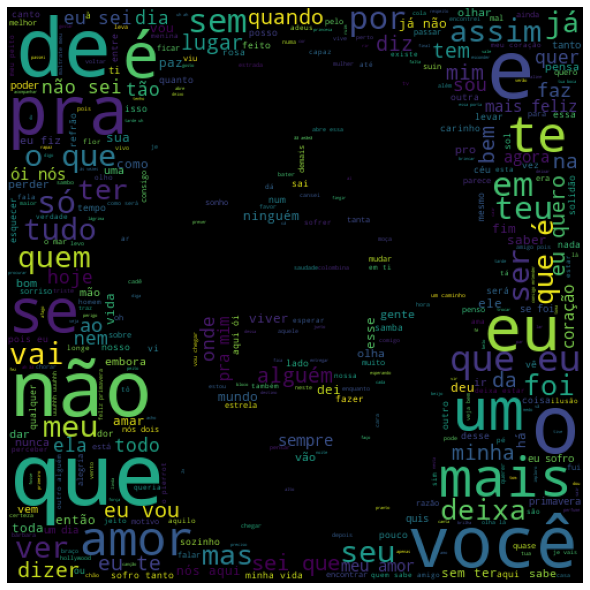

In [148]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# removendo os eixos do gráfico

plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [149]:
from collections import Counter

losHermanos_count = Counter(tokens)

customizada = losHermanos_count.most_common(20)

customizada

[('que', 321),
 ('eu', 243),
 ('o', 188),
 ('não', 171),
 ('e', 158),
 ('de', 149),
 ('a', 140),
 ('pra', 118),
 ('é', 107),
 ('você', 94),
 ('me', 93),
 ('um', 93),
 ('se', 91),
 ('te', 80),
 ('mais', 79),
 ('meu', 61),
 ('do', 57),
 ('sem', 55),
 ('amor', 53),
 ('em', 52)]

In [216]:
stopwords_customizada = STOPWORDS.union({'que', 'eu', 'o', 'não', 'e', 'de', 'e', 'pra', 'é', 'me', 'um', 'se', 'te', 'mais', 'do', 'sem', 'já', 'foi', 'mas', 'por', 'tão', 'meu', 'seu', 'teu', 'vou', 'tudo', 'dei', 'ver', 'em', 'na', 'ao', 'dá', 'tem', 'minha', 'mim', 'da', 'faz', 'olha', 'ter', 'esse', 'para', 'que', 'o', 'de', 'vai', 'pro', 'uma', 'ói', 'todo','como','assim', 'então', 'pois', 'seu', 'ser', 'sou'})

In [217]:
wordcloud = WordCloud (background_color = 'black',
                      stopwords = stopwords_customizada,
                      mask=imagem_mascara,
                      colormap='Purples',
                      random_state=42). generate(palavras_losHermanos)

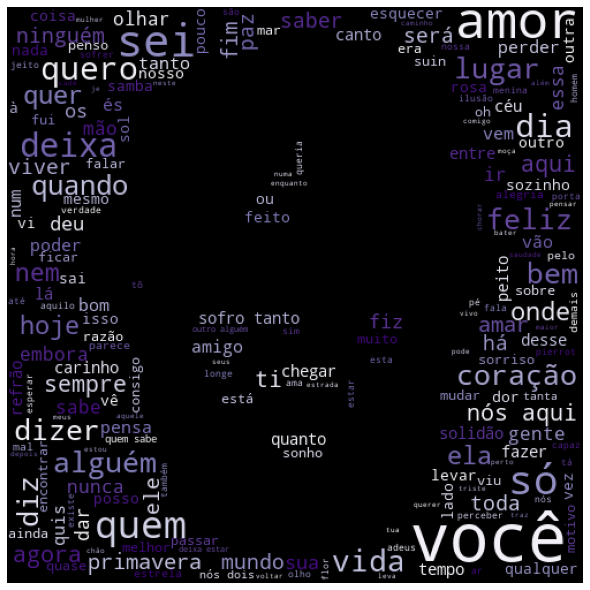

In [218]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# removendo os eixos do gráfico

plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [219]:
wordcloud = WordCloud (background_color = 'black',
                      stopwords = stopwords_customizada,
                      contour_width = 1,
                      contour_color = 'white',
                      mask=imagem_mascara,
                      colormap='Purples',
                      random_state=42). generate(palavras_losHermanos)

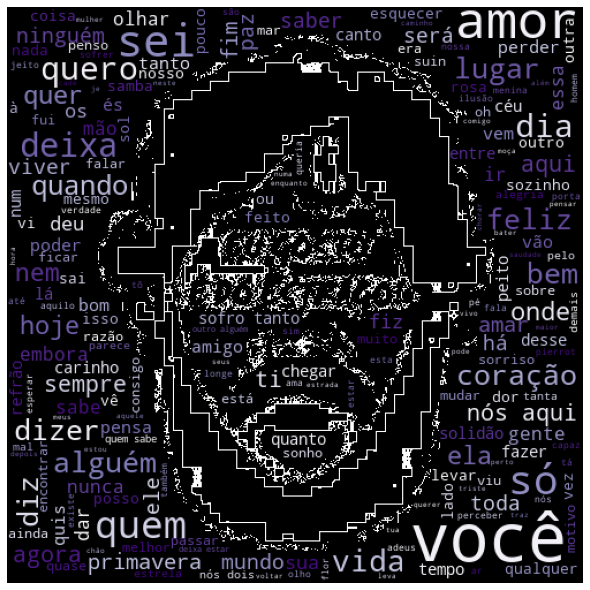

In [220]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# removendo os eixos do gráfico

plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [225]:
# Sem máscara

wordcloud = WordCloud(background_color = 'black',
                stopwords = stopwords_customizada,
                contour_width = 1,
                contour_color  = 'white',
                colormap='Purples',
                random_state=42).generate(palavras_losHermanos)

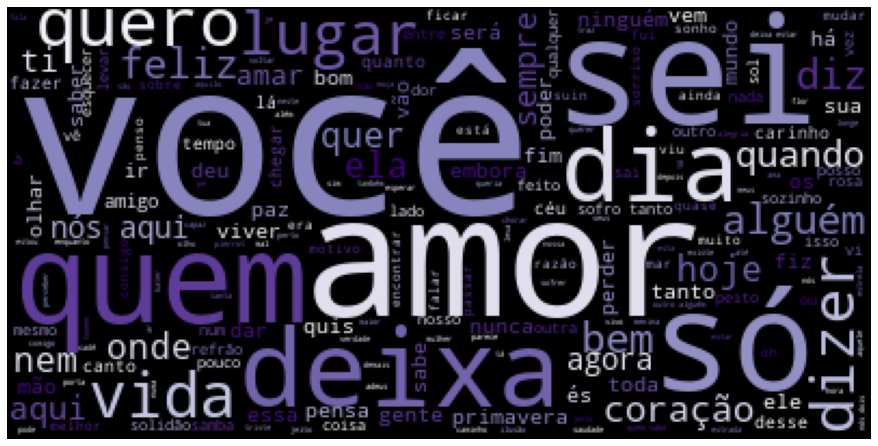

In [226]:
# Mostrando a imagem
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [230]:
wordcloud.to_file('./img/losHermanos3.png')